In [2]:
from google.cloud import bigquery
from google.oauth2 import service_account
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
credentials = service_account.Credentials.from_service_account_file('C:/Users/Helen.Tian/Downloads/YETI Google Analytics-45214aca550b.json')# PATH IN YOUR COMPUTER
project_id = 'enduring-hue-184016'   
client = bigquery.Client(credentials= credentials,project=project_id)

In [3]:
#add soft coolers to cart actions
query_job = client.query("SELECT * FROM `enduring-hue-184016.121992452.BackInStock_AddToCart` ")
results = query_job.result()
df = results.to_dataframe()

In [4]:
df = df.rename(columns={'a_date': 'noti_date','a_eventLabel': 'label', 'a_visitorid': 'visitorid', 'b_date': 'add_date' })

In [5]:
df=df.sort_values(['noti_date', 'add_date'])

In [6]:
df=df.drop_duplicates(subset=['noti_date','visitorid','label'],keep='first')

In [7]:
df.head()

,noti_date,visitorid,label,add_date
1377,2018-01-01,6024834859958877284,tundra 105,2018-01-02
1392,2018-01-01,130447693118504633,loadout lid,2018-01-03
2086,2018-01-01,6302383768400349464,hopper flip 8,2018-01-03
2573,2018-01-01,2145889413471518220,rambler 14 oz mug,2018-01-03
8800,2018-01-01,5418812650916859363,rambler 10 oz lowball,2018-01-03


In [8]:
df.groupby(['label'])['noti_date'].count().to_frame(name = 'num').reset_index().sort_values(['num'], ascending=False).head(20)

,label,num
33,rambler 10 oz wine tumbler,13293
37,rambler 20 oz tumbler,2160
2,camino carryall 35,1626
39,rambler 30 oz tumbler,1521
35,rambler 14 oz mug,1458
32,rambler 10 oz lowball,738
51,roadie 20,557
36,rambler 18 oz bottle,464
41,rambler bottle chug cap,426
54,sidekick dry,345


In [9]:
df.noti_date= pd.to_datetime(df.noti_date) 

In [10]:
df.add_date= pd.to_datetime(df.add_date) 

In [11]:
TimeInterval = ((df.add_date-df.noti_date) / np.timedelta64(1, 'D')).astype(int)

In [12]:
from collections import Counter

In [13]:
labels, values = zip(*Counter(TimeInterval).items())

In [17]:
Counter(TimeInterval)

Counter({1: 1435,
         2: 1190,
         3: 970,
         4: 928,
         5: 769,
         6: 868,
         7: 920,
         8: 686,
         9: 659,
         10: 691,
         11: 585,
         12: 515,
         13: 726,
         14: 1413,
         15: 531,
         16: 484,
         17: 575,
         18: 408,
         19: 373,
         20: 374,
         21: 414,
         22: 321,
         23: 374,
         24: 282,
         25: 275,
         26: 400,
         27: 276,
         28: 403,
         29: 724,
         30: 206,
         31: 132,
         32: 139,
         33: 121,
         34: 102,
         35: 148,
         36: 119,
         37: 141,
         38: 117,
         39: 91,
         40: 110,
         41: 92,
         42: 148,
         43: 157,
         44: 94,
         45: 83,
         46: 67,
         47: 89,
         48: 64,
         49: 65,
         50: 65,
         51: 64,
         52: 61,
         53: 60,
         54: 75,
         55: 59,
         56: 82,
         57: 

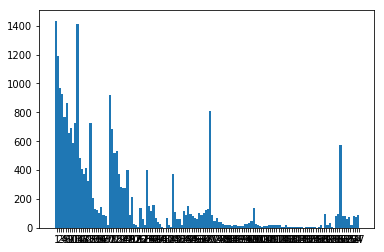

In [18]:
indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [19]:
TimeInterval.describe()

count    24900.000000
mean        24.485261
std         25.403651
min          1.000000
25%          7.000000
50%         15.000000
75%         30.000000
max        147.000000
dtype: float64

In [44]:
len(df)

24900

In [45]:
24900/146689

0.169746879452447